In [59]:
from pathlib import Path

data_folders = Path("data").glob("*/")

In [60]:
dev = []
test = []
train = []

In [61]:
import re 
import srsly 
recommendations  = 0
for folder in data_folders:
    for subfolder in folder.glob("*/"):
        if subfolder.name == "dev":
            for file in (subfolder / 'parsed_pdfs').glob("*.json"):
                # get numbers from file.name 
                row = {"text": "", "cats": {}}
                item = srsly.read_json(file)
                title = item.get('metadata','').get('title','')
                if title:
                    row["text"] += title + "\n"
                sections = item.get('metadata').get('sections',[])
                if sections:
                    for section in sections:
                        if section.get('heading'):
                            row["text"] += section.get('heading') + "\n"
                        if section.get('text'): 
                            row["text"] += section.get('text') + "\n"


                file_name = file.name.replace('.pdf.json', '.json')
                if (subfolder / 'reviews' / file_name).exists():
                    review = srsly.read_json(subfolder / 'reviews' / file_name)
                    reviews = review.get('reviews',[])
                    if len(reviews) == 0:
                        continue
                    for r in reviews:
                        if "RECOMMENDATION" in r.keys():
                            score = int(r["RECOMMENDATION"])
                            if score <=3:
                                row['cats'] = {"READ":0.0,"DONTREAD":1.0}
                            else:
                                row['cats'] = {"READ":1.0,"DONTREAD":0.0}
                    row['reviews'] = reviews
                    dev.append(row)
                
                #dev.append(srsly.read_json(file))                
        elif subfolder.name == "test":
            for file in (subfolder / 'parsed_pdfs').glob("*.json"):
                # get numbers from file.name 
                row = {"text": "", "cats": {}}
                item = srsly.read_json(file)
                title = item.get('metadata',"").get('title','')
                if title:
                    row["text"] += title + "\n"
                sections = item.get('metadata').get('sections',[])
                if sections:
                    for section in sections:
                        if section.get('heading'):
                            row["text"] += section.get('heading') + "\n"
                        if section.get('text'): 
                            row["text"] += section.get('text') + "\n"

                
                file_name = file.name.replace('.pdf.json', '.json')
                if (subfolder / 'reviews' / file_name).exists():
                    review = srsly.read_json(subfolder / 'reviews' / file_name)
                    score = 0
                    reviews = review.get('reviews',[])
                    if len(reviews) == 0:
                        continue
                    for r in reviews:
                        if "RECOMMENDATION" in r.keys():
                            score = int(r["RECOMMENDATION"])
                            if score <=3:
                                row['cats'] = {"READ":0.0,"DONTREAD":1.0}
                            else:
                                row['cats'] = {"READ":1.0,"DONTREAD":0.0}
                    row['reviews'] = reviews
                    test.append(row)
               
        elif subfolder.name == "train":
            for file in (subfolder / 'parsed_pdfs').glob("*.json"):
                # get numbers from file.name 
                row = {"text": "", "cats": {}}
                item = srsly.read_json(file)
                title = item.get('metadata',"").get('title','')
                if title:
                    row["text"] += title + "\n"
                sections = item.get('metadata').get('sections',[])
                if sections:
                    for section in sections:
                        if section.get('heading'):
                            row["text"] += section.get('heading') + "\n"
                        if section.get('text'): 
                            row["text"] += section.get('text') + "\n"

                file_name = file.name.replace('.pdf.json', '.json')
                if (subfolder / 'reviews' / file_name).exists():
                    review = srsly.read_json(subfolder / 'reviews' / file_name)
                    reviews = review.get('reviews',[])
                    
                    if len(reviews) == 0:
                        continue
                    for r in reviews:
                        if "RECOMMENDATION" in r.keys():
                            score = int(r["RECOMMENDATION"])
                            if score <=3:
                                row['cats'] = {"READ":0.0,"DONTREAD":1.0}
                            else:
                                row['cats'] = {"READ":1.0,"DONTREAD":0.0}
                    row['reviews'] = reviews
                    train.append(row)
               

In [62]:
print(len(dev), len(test), len(train))

48 47 491


In [64]:
import json 
with open('dev_data.jsonl', 'w') as f:
    for item in dev:
        f.write(json.dumps(item) + '\n')
with open('test_data.jsonl', 'w') as f:
    for item in test:
        f.write(json.dumps(item) + '\n')
with open('train_data.jsonl', 'w') as f:
    for item in train:
        f.write(json.dumps(item) + '\n')

In [55]:
recs = []
for item in dev + test + train:
    if 'cats' in item.keys() and 'RECOMMENDATION' in item['cats'].keys():
        recs.append(item['cats']['RECOMMENDATION'])

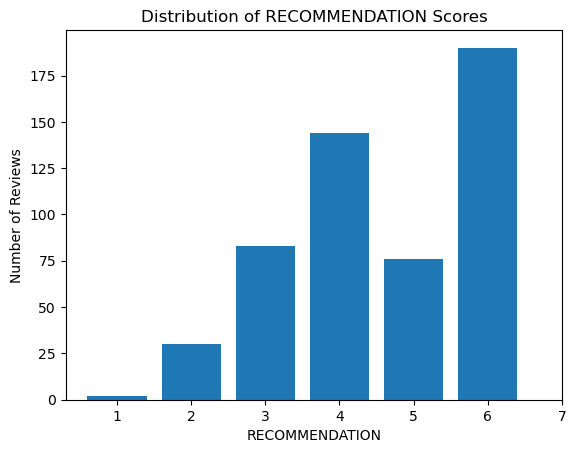

In [58]:
#plot histogram of recs
import matplotlib.pyplot as plt
plt.hist(recs, bins=range(1,8), align='left', rwidth=0.8)
plt.xticks(range(1,8))
plt.xlabel('RECOMMENDATION')
plt.ylabel('Number of Reviews')
plt.title('Distribution of RECOMMENDATION Scores')
plt.show()

CONLL   
5 = Exciting: I'd fight to get it accepted  
4 = Worthy: I would like to see it accepted  
3 = Borderline: I'm ambivalent about this one  
2 = Mediocre: I'd rather not see it in the conference  
1 = Poor: I'd fight to have it rejected   

In [65]:
#distribution of READ DONTREAD
read_counts = {"READ":0, "DONTREAD":0}
for item in dev + test + train:
    if 'cats' in item.keys():
        read_counts["READ"] += item['cats'].get("READ",0)
        read_counts["DONTREAD"] += item['cats'].get("DONTREAD",0)

In [66]:
read_counts

{'READ': 471.0, 'DONTREAD': 115.0}